<a href="https://colab.research.google.com/github/Alejo311548/Deep_Learning_Project/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Preprocesado**
Andrea Sanchez Castrillón

Alejandro Vargas Ocampo



###**About  this file**
This file contain the stock data of NVIDIA from 1999 to 2025.
Source: [Kaggle NVIDIA Stock Data 2025](https://www.kaggle.com/datasets/umerhaddii/nvidia-stock-data-2024?resource=download&select=NVDA_1999-01-01_2025-08-18.csv)*texto en cursiva*

###**PREPROCESADO 1**: Enfoque target. Sube o baja el precio de la acción

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ibitabadger/DEEPLEARNING-NVIDIA2025/main/NVDA_1999-01-01_2025-08-18.csv')
df.head(5)

,date,open,high,low,close,adj_close,volume
0,NaN,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
1,1999-01-22,0.04374999925494194,0.04882799834012985,0.038802001625299454,0.041016001254320145,0.03760908916592598,2714688000
2,1999-01-25,0.04427099972963333,0.04583299905061722,0.041016001254320145,0.04531300067901611,0.04154917225241661,510480000
3,1999-01-26,0.04583299905061722,0.046744998544454575,0.04114599898457527,0.04179700091481209,0.038325235247612,343200000
4,1999-01-27,0.041926998645067215,0.04296899959445,0.0395830012857914,0.04166699945926666,0.03820601850748062,244368000


In [ ]:
df["date"] = pd.to_datetime(df["date"]) #asegurar correcto formato y orden de fechas
df = df.sort_values("date").reset_index(drop=True)

In [ ]:
# Revisar frecuencia
freq = df["date"].diff().value_counts()
print(freq)

date
1 days    5232
3 days    1207
4 days     176
2 days      64
5 days       2
7 days       1
Name: count, dtype: int64


In [ ]:
#Calculo del target binario: Baja(0), Sube(1)
df["target"] = (df["close"].shift(-1) > df["close"]).astype(int)
df = df.dropna()  # el último queda sin target
df.head(5)

,date,open,high,low,close,adj_close,volume,target
0,1999-01-22,0.04374999925494194,0.04882799834012985,0.038802001625299454,0.041016001254320145,0.03760908916592598,2714688000,1
1,1999-01-25,0.04427099972963333,0.04583299905061722,0.041016001254320145,0.04531300067901611,0.04154917225241661,510480000,0
2,1999-01-26,0.04583299905061722,0.046744998544454575,0.04114599898457527,0.04179700091481209,0.038325235247612,343200000,0
3,1999-01-27,0.041926998645067215,0.04296899959445,0.0395830012857914,0.04166699945926666,0.03820601850748062,244368000,0
4,1999-01-28,0.04166699945926666,0.041926998645067215,0.0412760004401207,0.04153599962592125,0.03808588162064552,227520000,0


In [ ]:
df["target"].value_counts(normalize=True)


,proportion
target,
1,0.516684
0,0.483316


In [ ]:
# df["return"] = df["close"].pct_change()
# df["log_return"] = np.log(df["close"] / df["close"].shift(1))
# df["volatility_10"] = df["log_return"].rolling(10).std()
# df["close_ma10"] = df["close"].rolling(10).mean()
# df["close_ma20"] = df["close"].rolling(20).mean()
# df["volume_ma10"] = df["volume"].rolling(10).mean()
# df["range"] = df["high"] - df["low"]

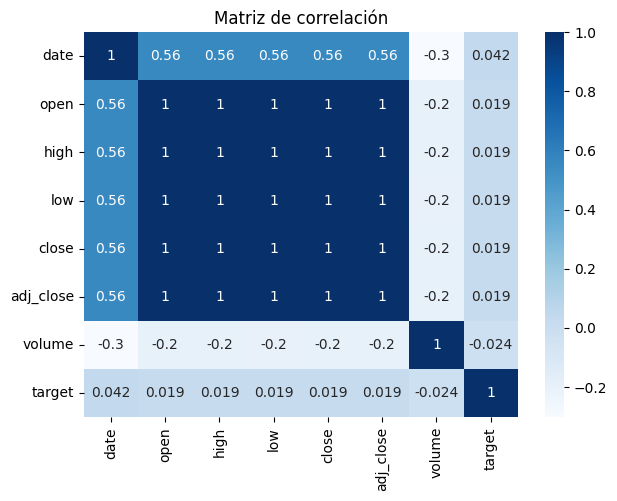

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.heatmap(df[["date","open", "high", "low", "close", "adj_close", "volume", "target"]].corr(), annot=True, cmap="Blues")
plt.title("Matriz de correlación")
plt.show()


In [ ]:
df = df[["date", "close", "volume", "target"]] #se eliminan variables redundantes

In [ ]:
print(df.head(5))

        date                 close      volume  target
0 1999-01-22  0.041016001254320145  2714688000       1
1 1999-01-25   0.04531300067901611   510480000       0
2 1999-01-26   0.04179700091481209   343200000       0
3 1999-01-27   0.04166699945926666   244368000       0
4 1999-01-28   0.04153599962592125   227520000       0


<Figure size 800x500 with 0 Axes>

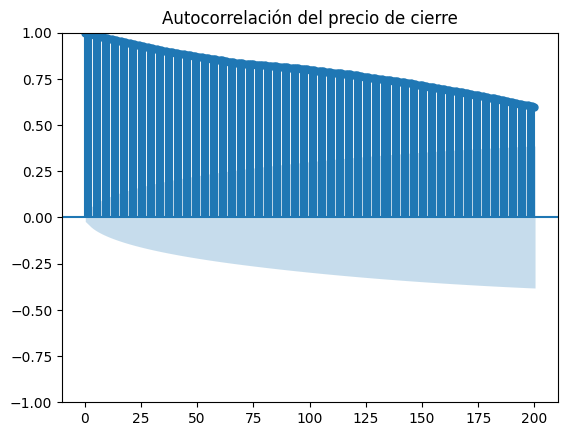

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(8,5))
plot_acf(df["close"], lags=200)
plt.title("Autocorrelación del precio de cierre")
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Normalización
features = ["close", "volume"]

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

In [ ]:
df_scaled.head(5)

,date,close,volume,target
0,1999-01-22,0.000038,0.292580,1
1,1999-01-25,0.000061,0.053283,0
2,1999-01-26,0.000042,0.035123,0
3,1999-01-27,0.000041,0.024393,0
4,1999-01-28,0.000041,0.022564,0


In [ ]:
df_scaled.to_csv("nvidia_preprocessed.csv", index=False)

###**PREPROCESADO 2**: Enfoque target. Cálculo del precio de la acción

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ibitabadger/DEEPLEARNING-NVIDIA2025/main/NVDA_1999-01-01_2025-08-18.csv')
df.head(10)

,date,open,high,low,close,adj_close,volume
0,NaN,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
1,1999-01-22,0.04374999925494194,0.04882799834012985,0.038802001625299454,0.041016001254320145,0.03760908916592598,2714688000
2,1999-01-25,0.04427099972963333,0.04583299905061722,0.041016001254320145,0.04531300067901611,0.04154917225241661,510480000
3,1999-01-26,0.04583299905061722,0.046744998544454575,0.04114599898457527,0.04179700091481209,0.038325235247612,343200000
4,1999-01-27,0.041926998645067215,0.04296899959445,0.0395830012857914,0.04166699945926666,0.03820601850748062,244368000
5,1999-01-28,0.04166699945926666,0.041926998645067215,0.0412760004401207,0.04153599962592125,0.03808588162064552,227520000
6,1999-01-29,0.04153599962592125,0.04166699945926666,0.0395830012857914,0.0395830012857914,0.036295123398303986,244032000
7,1999-02-01,0.0395830012857914,0.04062499850988388,0.0395830012857914,0.04036499932408333,0.03701217472553253,154704000
8,1999-02-02,0.0395830012857914,0.04062499850988388,0.03606799989938736,0.03723999857902527,0.0341467447578907,264096000
9,1999-02-03,0.036719001829624176,0.0385419987142086,0.03645800054073334,0.03802099823951721,0.03486286848783493,75120000


In [ ]:
# Importaciones básicas
import numpy as np  # Para operaciones numéricas y arrays
import pandas as pd  # Para manipulación y análisis de datos estructurados
import matplotlib.pyplot as plt  # Para visualizaciones gráficas

# Scikit-learn para evaluación
from sklearn.preprocessing import StandardScaler  # Para estandarización de características (media=0, varianza=1)

In [ ]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/ibitabadger/DEEPLEARNING-NVIDIA2025/main/NVDA_1999-01-01_2025-08-18.csv')

# Limpieza inicial
print("Forma original del dataset:", df.shape)
print("\nPrimeras filas:")
print(df.head())

# La primera fila tiene nombres de columnas duplicados
df_clean = df.copy()
df_clean = df_clean.drop(0).reset_index(drop=True)

# Convertir tipos de datos
df_clean['date'] = pd.to_datetime(df_clean['date'])
numeric_cols = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Crear columna de retornos
df_clean['returns'] = df_clean['adj_close'].pct_change() * 100

print(f"\nDataset limpio: {df_clean.shape}")
print(f"Rango de fechas: {df_clean['date'].min()} a {df_clean['date'].max()}")
print(f"\nValores nulos por columna:")
print(df_clean.isnull().sum())

# Rellenar valores nulos
df_clean = df_clean.ffill().bfill()

Forma original del dataset: (6684, 7)

Primeras filas:
         date                  open                  high  \
0         NaN                  NVDA                  NVDA   
1  1999-01-22   0.04374999925494194   0.04882799834012985   
2  1999-01-25   0.04427099972963333   0.04583299905061722   
3  1999-01-26   0.04583299905061722  0.046744998544454575   
4  1999-01-27  0.041926998645067215      0.04296899959445   

                    low                 close            adj_close      volume  
0                  NVDA                  NVDA                 NVDA        NVDA  
1  0.038802001625299454  0.041016001254320145  0.03760908916592598  2714688000  
2  0.041016001254320145   0.04531300067901611  0.04154917225241661   510480000  
3   0.04114599898457527   0.04179700091481209    0.038325235247612   343200000  
4    0.0395830012857914   0.04166699945926666  0.03820601850748062   244368000  

Dataset limpio: (6683, 8)
Rango de fechas: 1999-01-22 00:00:00 a 2025-08-15 00:00:00

Valor

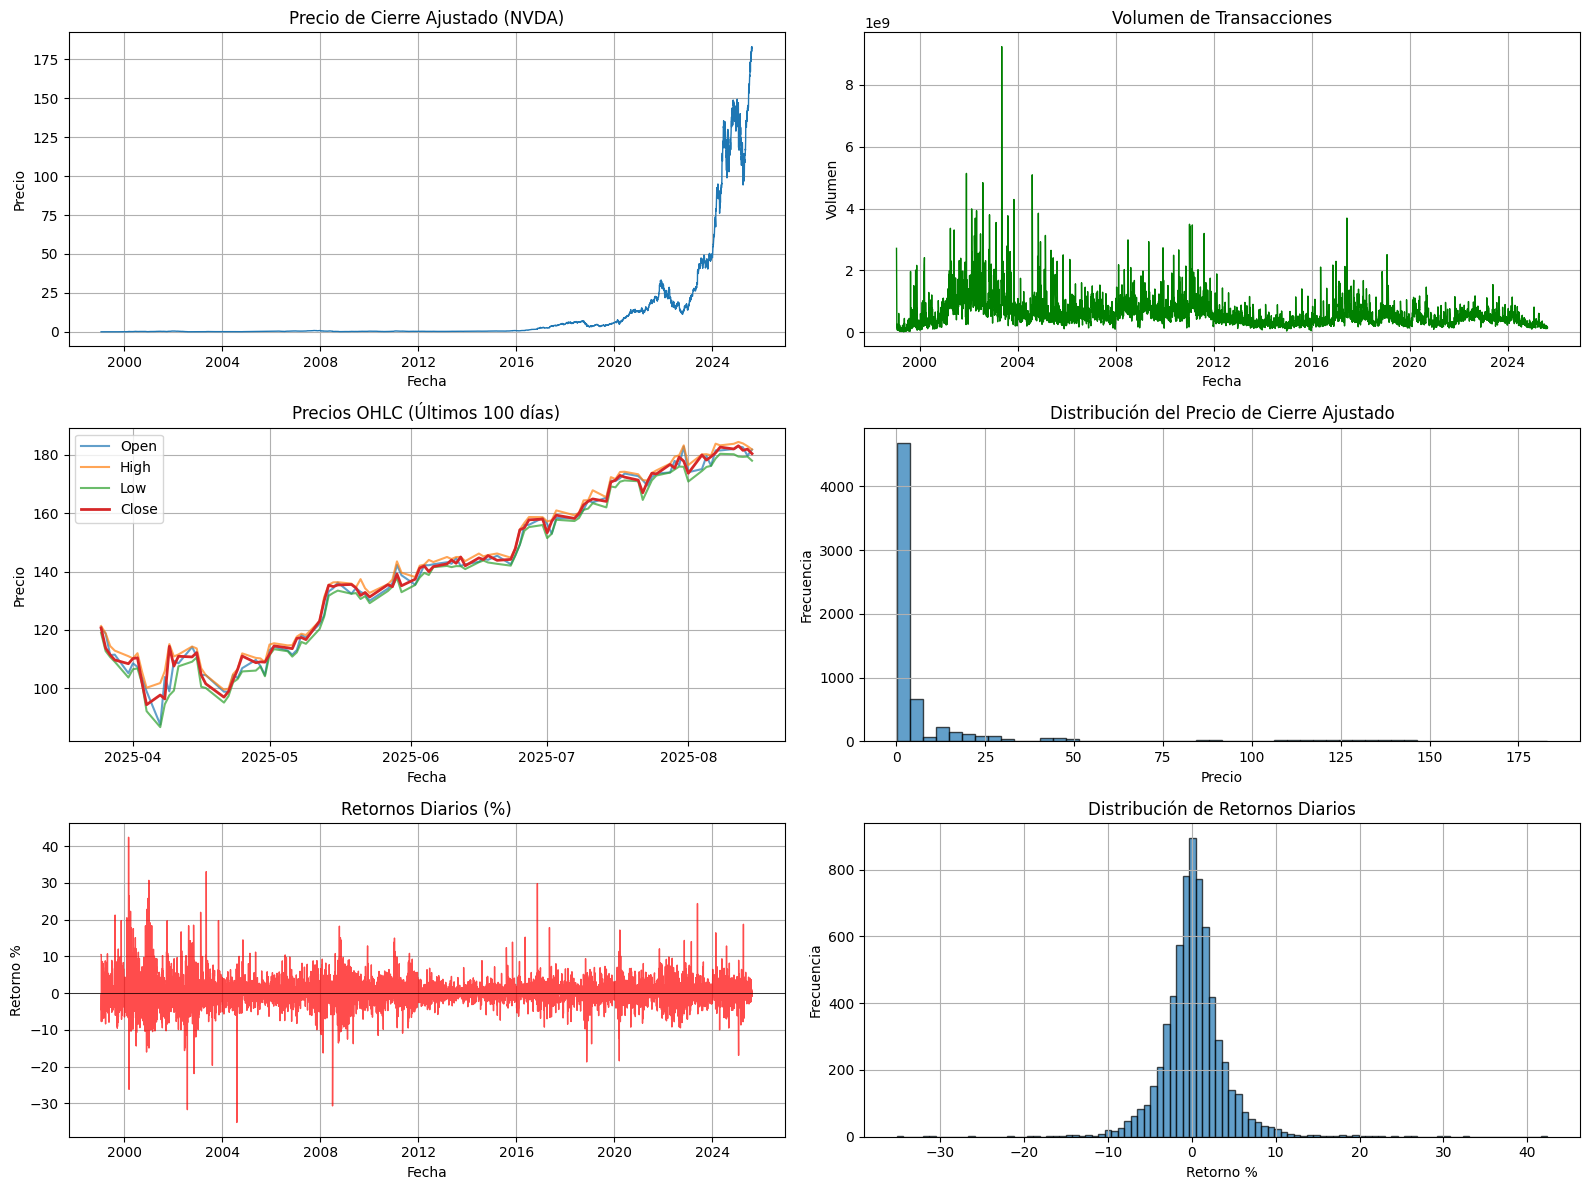

ESTADÍSTICAS DESCRIPTIVAS

Precio de Cierre Ajustado:
count    6683.000000
mean       11.159314
std        29.550367
min         0.031281
25%         0.260199
50%         0.442746
75%         5.168579
max       183.160004
Name: adj_close, dtype: float64

Retornos Diarios:
count    6683.000000
mean        0.199127
std         3.775107
min       -35.233596
25%        -1.619414
50%         0.137227
75%         1.841717
max        42.414746
Name: returns, dtype: float64

Volumen:
count    6.683000e+03
mean     5.922780e+08
std      4.297284e+08
min      1.968000e+07
25%      3.292200e+08
50%      4.940700e+08
75%      7.246080e+08
max      9.230856e+09
Name: volume, dtype: float64


In [ ]:
# Análisis exploratorio de datos
# Crear una figura con 3 filas y 2 columnas de subgráficas, con tamaño especificado
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# 1. Precio de cierre ajustado
# Gráfico de línea del precio de cierre ajustado a lo largo del tiempo
axes[0, 0].plot(df_clean['date'], df_clean['adj_close'], linewidth=1)
axes[0, 0].set_title('Precio de Cierre Ajustado (NVDA)')  # Título de la gráfica
axes[0, 0].set_xlabel('Fecha')  # Etiqueta del eje X
axes[0, 0].set_ylabel('Precio')  # Etiqueta del eje Y
axes[0, 0].grid(True)  # Activar cuadrícula para mejor visualización

# 2. Volumen
# Gráfico de línea del volumen de transacciones a lo largo del tiempo
axes[0, 1].plot(df_clean['date'], df_clean['volume'], linewidth=1, color='green')
axes[0, 1].set_title('Volumen de Transacciones')  # Título de la gráfica
axes[0, 1].set_xlabel('Fecha')  # Etiqueta del eje X
axes[0, 1].set_ylabel('Volumen')  # Etiqueta del eje Y
axes[0, 1].grid(True)  # Activar cuadrícula

# 3. OHLC (últimos 100 días)
# Preparar datos: tomar los últimos 100 días o menos si no hay suficientes datos
sample_size = min(100, len(df_clean))
df_sample = df_clean.tail(sample_size)  # Seleccionar las últimas 'sample_size' filas

# Gráfico múltiple de líneas para precios OHLC (Open, High, Low, Close)
axes[1, 0].plot(df_sample['date'], df_sample['open'], label='Open', alpha=0.7)
axes[1, 0].plot(df_sample['date'], df_sample['high'], label='High', alpha=0.7)
axes[1, 0].plot(df_sample['date'], df_sample['low'], label='Low', alpha=0.7)
axes[1, 0].plot(df_sample['date'], df_sample['close'], label='Close', linewidth=2)
axes[1, 0].set_title('Precios OHLC (Últimos 100 días)')  # Título de la gráfica
axes[1, 0].set_xlabel('Fecha')  # Etiqueta del eje X
axes[1, 0].set_ylabel('Precio')  # Etiqueta del eje Y
axes[1, 0].legend()  # Mostrar leyenda para identificar cada línea
axes[1, 0].grid(True)  # Activar cuadrícula

# 4. Distribución de precios
# Histograma de la distribución del precio de cierre ajustado
axes[1, 1].hist(df_clean['adj_close'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribución del Precio de Cierre Ajustado')  # Título de la gráfica
axes[1, 1].set_xlabel('Precio')  # Etiqueta del eje X
axes[1, 1].set_ylabel('Frecuencia')  # Etiqueta del eje Y
axes[1, 1].grid(True)  # Activar cuadrícula

# 5. Retornos diarios
# Gráfico de línea de los retornos diarios porcentuales
axes[2, 0].plot(df_clean['date'], df_clean['returns'], linewidth=1, color='red', alpha=0.7)
axes[2, 0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # Línea horizontal en y=0 como referencia
axes[2, 0].set_title('Retornos Diarios (%)')  # Título de la gráfica
axes[2, 0].set_xlabel('Fecha')  # Etiqueta del eje X
axes[2, 0].set_ylabel('Retorno %')  # Etiqueta del eje Y
axes[2, 0].grid(True)  # Activar cuadrícula

# 6. Distribución de retornos
# Histograma de la distribución de los retornos diarios
axes[2, 1].hist(df_clean['returns'].dropna(), bins=100, edgecolor='black', alpha=0.7)
axes[2, 1].set_title('Distribución de Retornos Diarios')  # Título de la gráfica
axes[2, 1].set_xlabel('Retorno %')  # Etiqueta del eje X
axes[2, 1].set_ylabel('Frecuencia')  # Etiqueta del eje Y
axes[2, 1].grid(True)  # Activar cuadrícula

# Ajustar el diseño para que no se solapen las gráficas
plt.tight_layout()
# Mostrar todas las gráficas
plt.show()

# Estadísticas descriptivas
# Imprimir separador visual
print("="*60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*60)

# Estadísticas descriptivas para el precio de cierre ajustado
print("\nPrecio de Cierre Ajustado:")
print(df_clean['adj_close'].describe())  # Métricas: count, mean, std, min, percentiles, max

# Estadísticas descriptivas para los retornos diarios
print("\nRetornos Diarios:")
print(df_clean['returns'].describe())  # Métricas de distribución de retornos

# Estadísticas descriptivas para el volumen
print("\nVolumen:")
print(df_clean['volume'].describe())  # Métricas de volumen de transacciones

In [ ]:
class TimeSeriesPreprocessor:
    def __init__(self, target_col='adj_close', context_length=80, prediction_length=20):
        # Inicializa el preprocesador con configuración básica
        self.target_col = target_col  # Columna objetivo para predicción
        self.context_length = context_length  # Longitud de la ventana de contexto histórico
        self.prediction_length = prediction_length  # Horizonte de predicción futuro
        self.scaler = StandardScaler()  # Escalador para normalización de características

    def create_time_features(self, df):
        """Crear características temporales a partir de la columna de fecha"""
        df = df.copy()  # Crear copia para no modificar el DataFrame original

        # Extraer características temporales básicas de la fecha
        df['year'] = df['date'].dt.year
        df['month'] = df['date'].dt.month
        df['day'] = df['date'].dt.day
        df['dayofweek'] = df['date'].dt.dayofweek  # Día de la semana (0=lunes, 6=domingo)
        df['quarter'] = df['date'].dt.quarter  # Trimestre del año
        df['dayofyear'] = df['date'].dt.dayofyear  # Día del año
        df['weekofyear'] = df['date'].dt.isocalendar().week  # Semana del año

        # Características cíclicas para capturar patrones periódicos
        # Transformación seno y coseno para mes (para tratar meses como cíclicos)
        df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
        df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
        # Transformación seno y coseno para día de la semana
        df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek']/7)
        df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek']/7)

        return df

    def create_lag_features(self, df, lags=[1, 2, 3, 5, 7, 10, 14, 20]):
        """Crear características de retardo (lag features) y estadísticas móviles"""
        # Crear columna de retornos si no existe
        if 'returns' not in df.columns:
            df['returns'] = df[self.target_col].pct_change() * 100

        # Crear características de retardo (valores pasados del precio objetivo)
        for lag in lags:
            df[f'lag_{lag}'] = df[self.target_col].shift(lag)

        # Crear medias móviles para diferentes ventanas temporales
        for window in [5, 10, 20, 30]:
            df[f'ma_{window}'] = df[self.target_col].rolling(window=window).mean()
            df[f'volatility_{window}'] = df['returns'].rolling(window=window).std()  # Volatilidad

        return df

    def prepare_dataset(self, df):
        """Preparar dataset completo aplicando todas las transformaciones"""
        # Aplicar creación de características temporales
        df = self.create_time_features(df)
        # Aplicar creación de características de retardo
        df = self.create_lag_features(df)

        # Eliminar filas con valores NaN generados por operaciones de desplazamiento (shift)
        df = df.dropna().reset_index(drop=True)

        return df

# Aplicar preprocesamiento a los datos limpios
preprocessor = TimeSeriesPreprocessor(context_length=80, prediction_length=20)
df_processed = preprocessor.prepare_dataset(df_clean)

# Mostrar información del dataset procesado
print(f"Dataset procesado: {df_processed.shape}")
print(f"\nColumnas disponibles: {list(df_processed.columns)}")
print(f"\nPrimeras filas del dataset procesado:")
print(df_processed[['date', 'adj_close', 'returns', 'lag_1', 'ma_5']].head())

Dataset procesado: (6654, 35)

Columnas disponibles: ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume', 'returns', 'year', 'month', 'day', 'dayofweek', 'quarter', 'dayofyear', 'weekofyear', 'month_sin', 'month_cos', 'dayofweek_sin', 'dayofweek_cos', 'lag_1', 'lag_2', 'lag_3', 'lag_5', 'lag_7', 'lag_10', 'lag_14', 'lag_20', 'ma_5', 'volatility_5', 'ma_10', 'volatility_10', 'ma_20', 'volatility_20', 'ma_30', 'volatility_30']

Primeras filas del dataset procesado:
        date  adj_close   returns     lag_1      ma_5
0 1999-03-05   0.040235  5.643374  0.038086  0.040235
1 1999-03-08   0.040832  1.483581  0.040235  0.039973
2 1999-03-09   0.042146  3.217997  0.040832  0.040044
3 1999-03-10   0.041429 -1.701338  0.042146  0.040546
4 1999-03-11   0.039638 -4.322559  0.041429  0.040856


In [ ]:
df_processed.to_csv("nvidia_preprocessed2.csv", index=False)